In [14]:
%reset
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

%matplotlib inline

import cmocean

import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.img_tiles as cimgt
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter



Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [15]:
%cd /glade/u/home/eyankovsky/CWorthy

/glade/u/home/eyankovsky/CWorthy


In [21]:
da1 = xr.open_dataset('baselinetest.nc')[0,:,:,:]
da2 = xr.open_dataset('forcedtest.nc')

grd = xr.open_dataset('epac25km_grd.nc')

In [20]:
da1.shape

(2, 100, 162, 122)

In [24]:
grd.pm.shape

In [779]:
68169600-365*86400

36633600

In [781]:
36633600/86400-365

59.0

In [782]:
#Box model: 10 mol/m2/yr same as Mengyang
10/ 365.0 / 86400.0 * 1.0e3*59
#3.17e-4 #mmol/m2/s

#Mengyang 10mol/m2/year
#"10000/(365*86400)

0.018708777270421105

In [785]:
np.nansum(test)

8588.898541428673

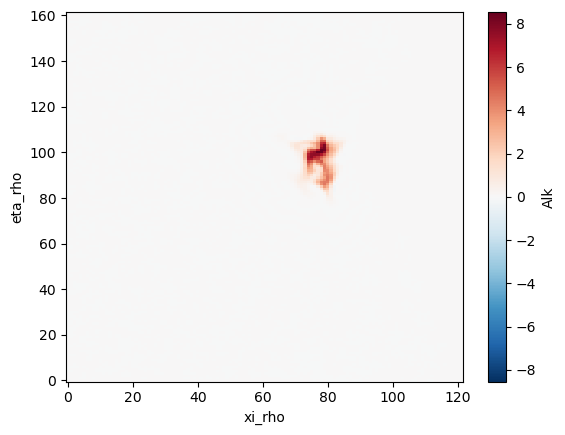

In [791]:
test = da2.Alk[-1,-1,:]-da1.Alk[-1,-1,:]
#test = da2.Alk[-1,:].sum('s_rho')-da1.Alk[-1,:].sum('s_rho')
test.plot()

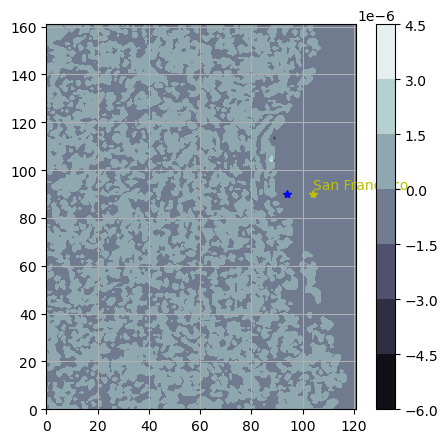

In [764]:
#depth = np.ma.array(grd.mask_rho)#, mask=grd.hraw >0)
resfac=1

fig = plt.figure(figsize=(5,5),dpi=100)
plt.contourf(da2.Alk[-1,0]-da1.Alk[-1,0],cmap='bone')
plt.plot(104,90,'*',color='y')
plt.plot(94,90,'*',color='b')

plt.text(104,92,'San Francisco',color='y')
plt.grid()
plt.colorbar()

# print(grd.lon_rho[104,90]-360)
# print(grd.lat_rho[104,90])

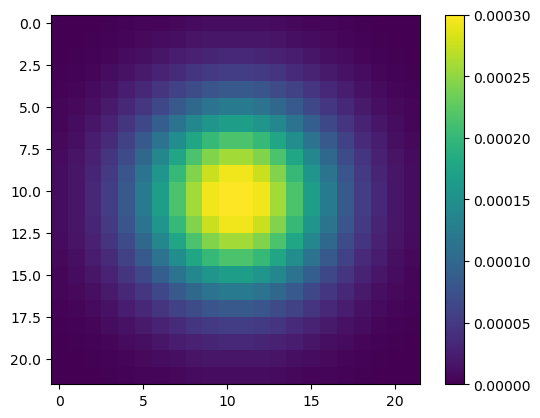

0.0003120853705307145

In [4]:
resfac=2

N = 11*resfac  # kernel size
k1d = signal.gaussian(N, std=2*resfac).reshape(N, 1)
kernel = np.outer(k1d, k1d)*3.17e-4
plt.imshow(kernel,vmin=0,vmax=3e-4)
plt.colorbar()

plt.show()
np.nanmax(kernel)
# A = np.zeros((16, 16))
# A[5, 9] = 1    # random
# plt.imshow(A)
# plt.show()

# row, col = np.where(A == 1)
# A[row[0]-(N//2):row[0]+(N//2)+1, col[0]-(N//2):col[0]+(N//2)+1] = kernel
# plt.imshow(A)

(0.0, 0.00032)

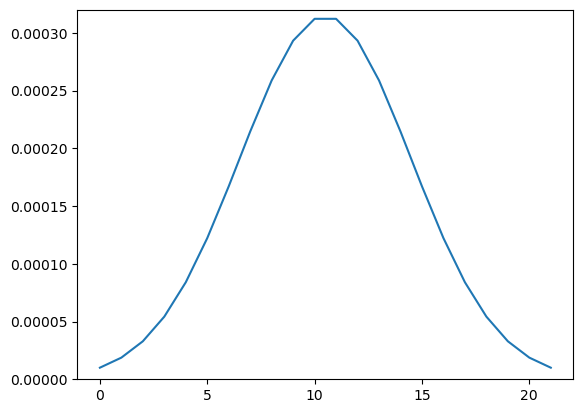

In [6]:
plt.plot(kernel[5*resfac,:])
plt.ylim([0,3.2e-4])


In [7]:
alk_flux = da.ALK[:]

low_lat = yloc-int(np.floor(N/2))
hi_lat  = yloc-int(np.floor(N/2))+N
low_lon = xloc-int(np.floor(N/2))-10*resfac
hi_lon  = xloc-int(np.floor(N/2))-10*resfac + N
alk_flux[:,low_lat:hi_lat,low_lon:hi_lon]=kernel


alk_flux[0,:].plot()

NameError: name 'da' is not defined

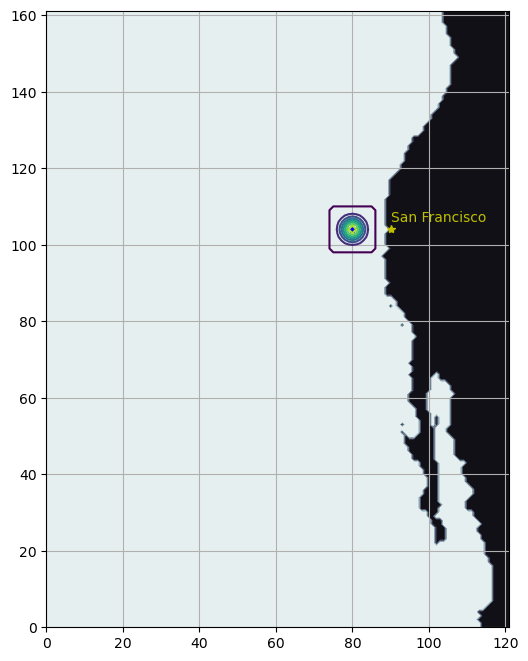

In [742]:
depth = np.ma.array(grd.mask_rho)#, mask=grd.hraw >0)
fig = plt.figure(figsize=(8,8),dpi=100)

plt.contourf(depth,cmap='bone')
#plt.colorbar()

plt.plot(xloc,yloc,'*',color='y')
plt.plot(xloc-10*resfac,yloc,'*',color='b')
plt.contour(alk_flux[0,:])
plt.gca().set_aspect('equal')

plt.text(xloc,yloc+2,'San Francisco',color='y')
plt.grid()



In [743]:
alk_flux.shape
da['ALK'] = alk_flux;
da.ALK.attrs["long_name"]="ALK flux into ocean"
da.ALK.attrs["units"]="mmol/m2/s"


In [744]:
%rm ALK_forcing.nc
da.to_netcdf('ALK_forcing.nc')


In [747]:
test = xr.open_dataset('ALK_forcing.nc')
test.dust_time

<xarray.DataArray 'dust_time' (time: 12)>
array([ 730.    ,  760.4375,  790.875 ,  821.3125,  851.75  ,  882.1875,
        912.625 ,  943.0625,  973.5   , 1003.9375, 1034.375 , 1064.8125])
Dimensions without coordinates: time

In [748]:
%pwd

'/glade/derecho/scratch/eyankovsky/C-Star/setup_tools/EASTPAC/EASTPAC_25KM/1.Make_grid'

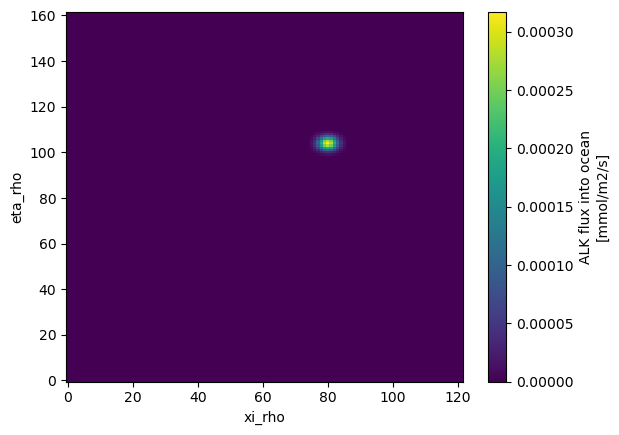

In [731]:
#test.ALK[0,low_lat+5,low_lon:hi_lon].plot()
test.ALK[0,:].plot()

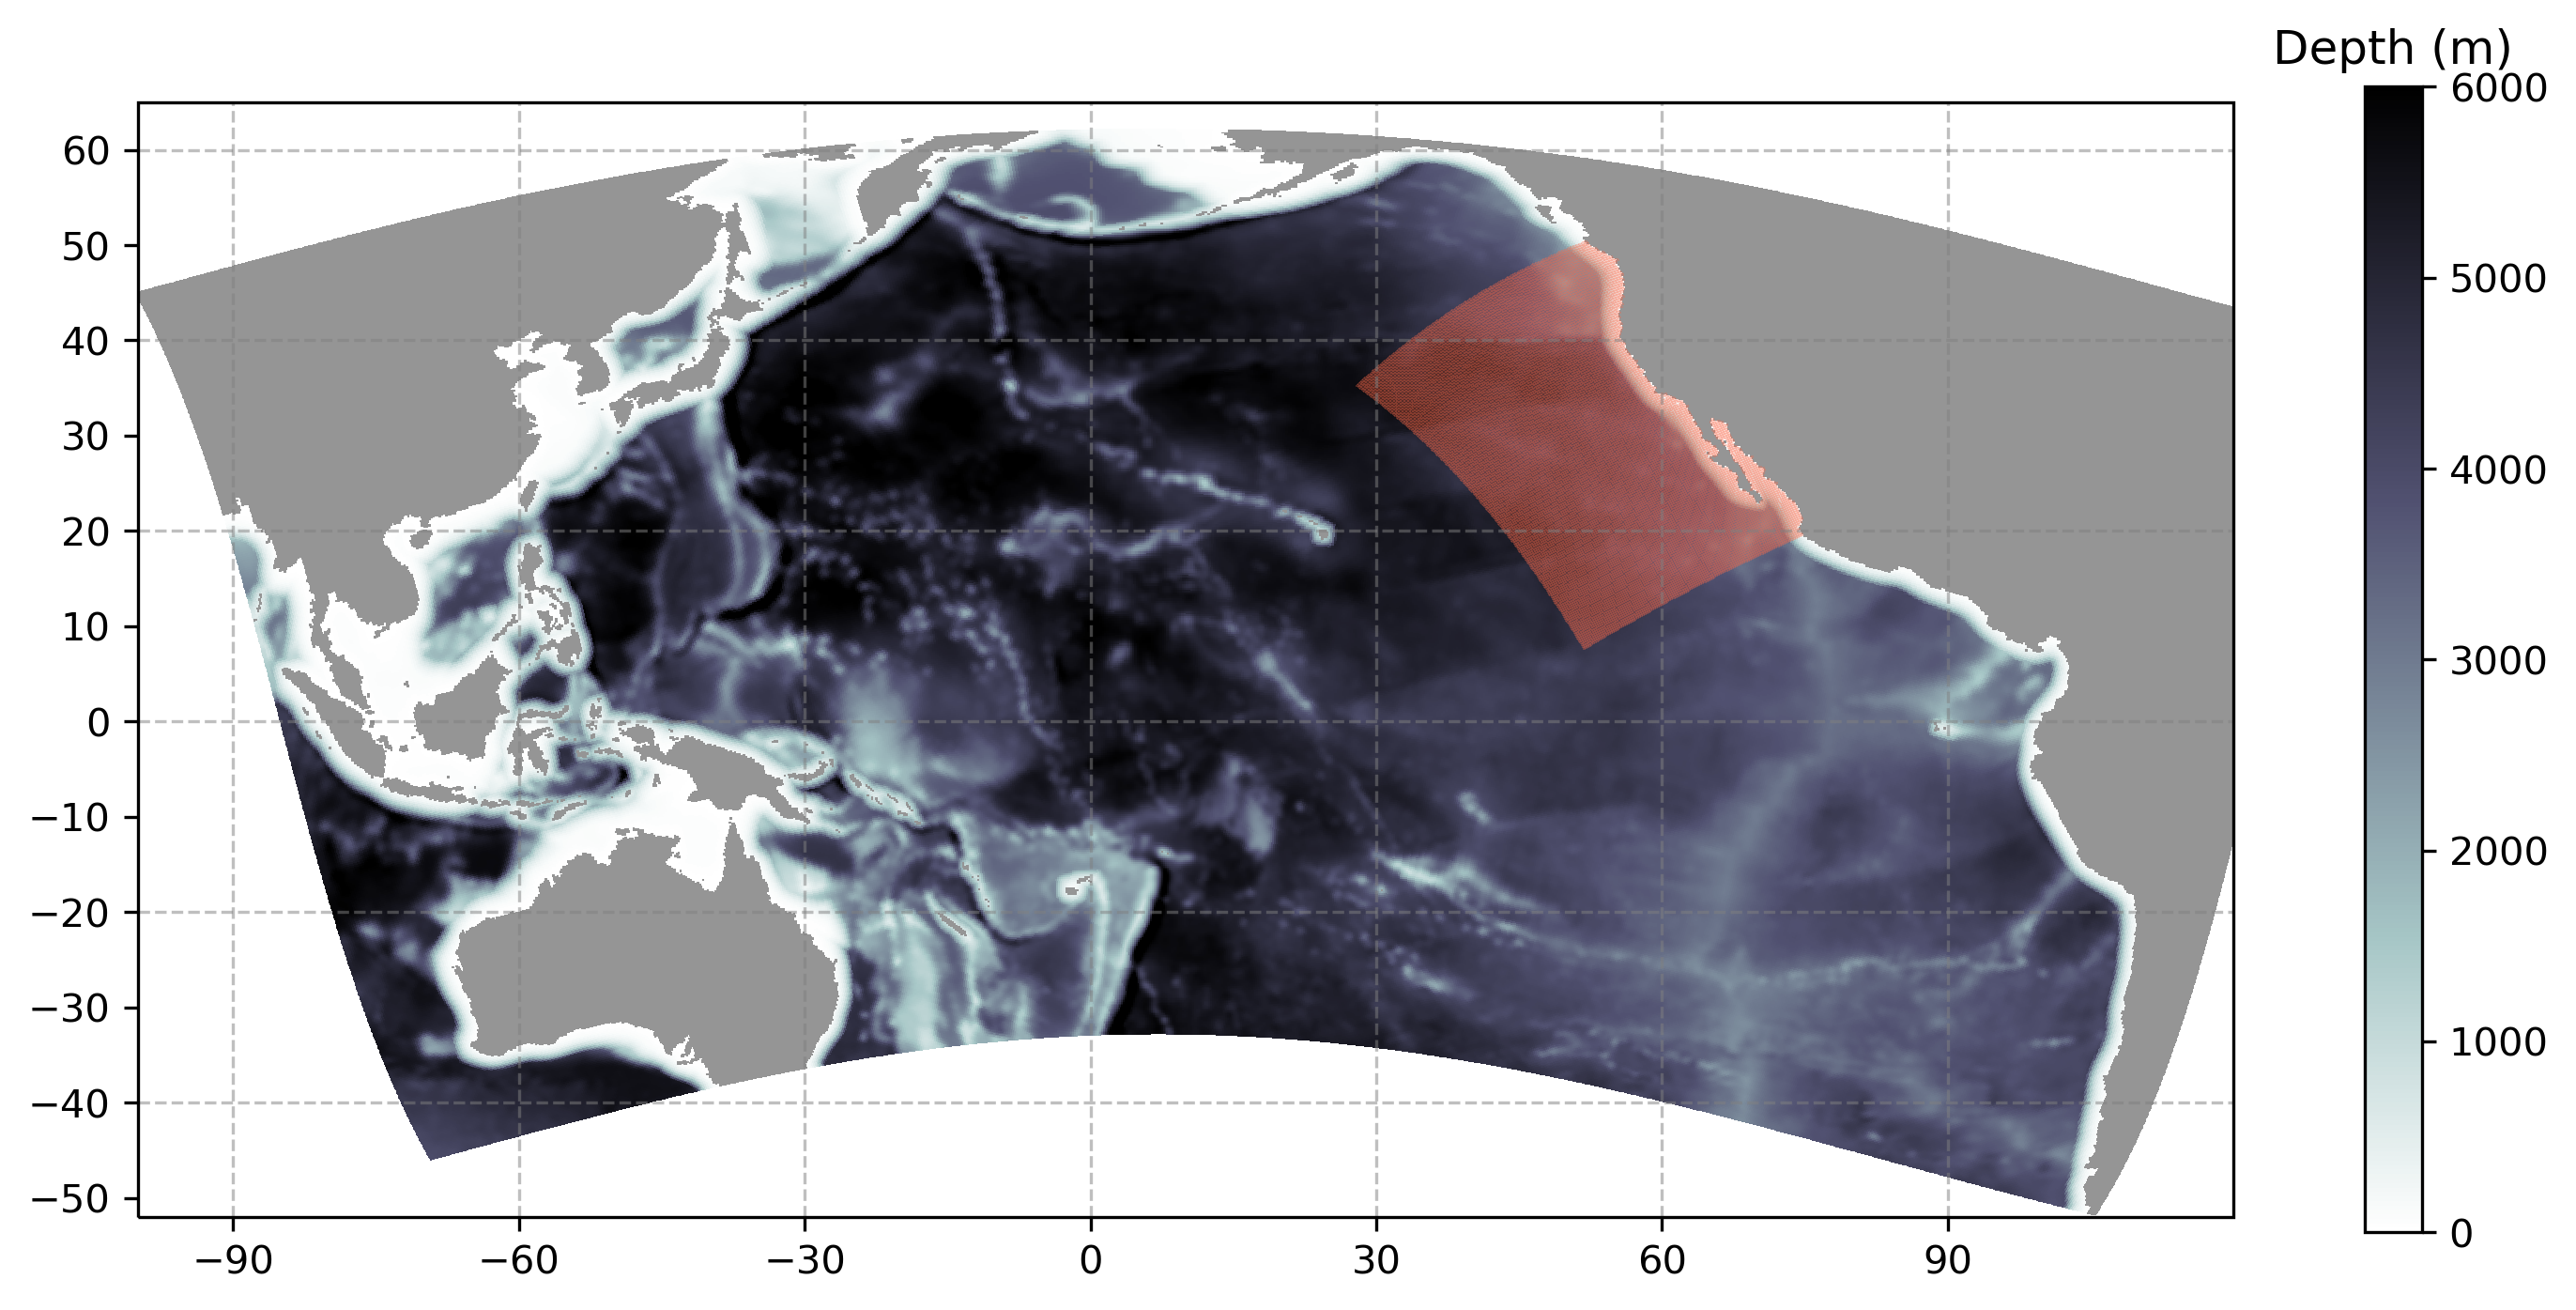

In [697]:

fig = plt.figure(figsize=(12,12),dpi=300)

ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

sca = ax.pcolormesh(parent_grd.lon_rho-180,
                parent_grd.lat_rho,
                parent_grd.h,
                transform=ccrs.PlateCarree(),
                cmap='bone_r',vmin=0,vmax=6000);
cb = fig.colorbar(sca, ax=ax, shrink=0.44)

sca = ax.pcolormesh(parent_grd.lon_rho-180,
                parent_grd.lat_rho,
                parent_grd.mask_rho.where(parent_grd.mask_rho<1),
                transform=ccrs.PlateCarree(),
                cmap='Greys',vmin=-1,vmax=1);

sca = ax.pcolormesh(grd.lon_rho-180,
                grd.lat_rho,
                grd.mask_rho.where(grd.mask_rho>0),
                transform=ccrs.PlateCarree(),
                cmap='Reds',alpha=0.3,vmin=-1,vmax=3);

cb.ax.set_title('Depth (m)')


ax.set_extent([-100, 120, -52, 65], ccrs.PlateCarree())
ax.set_xticks(np.arange(-90, 120, 30), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(-50, 70, 10), crs=ccrs.PlateCarree())
# lon_formatter = LongitudeFormatter(zero_direction_label=False)
# lat_formatter = LatitudeFormatter()
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)  
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                  color='gray', alpha=0.5, linestyle='--')
#ax.stock_img()
#ax.add_feature(cfeature.LAND, facecolor='lightgray')

#ax.set_title('excess_ALK at surface ' + str(da.time.values[tstep])[:10], loc='left')


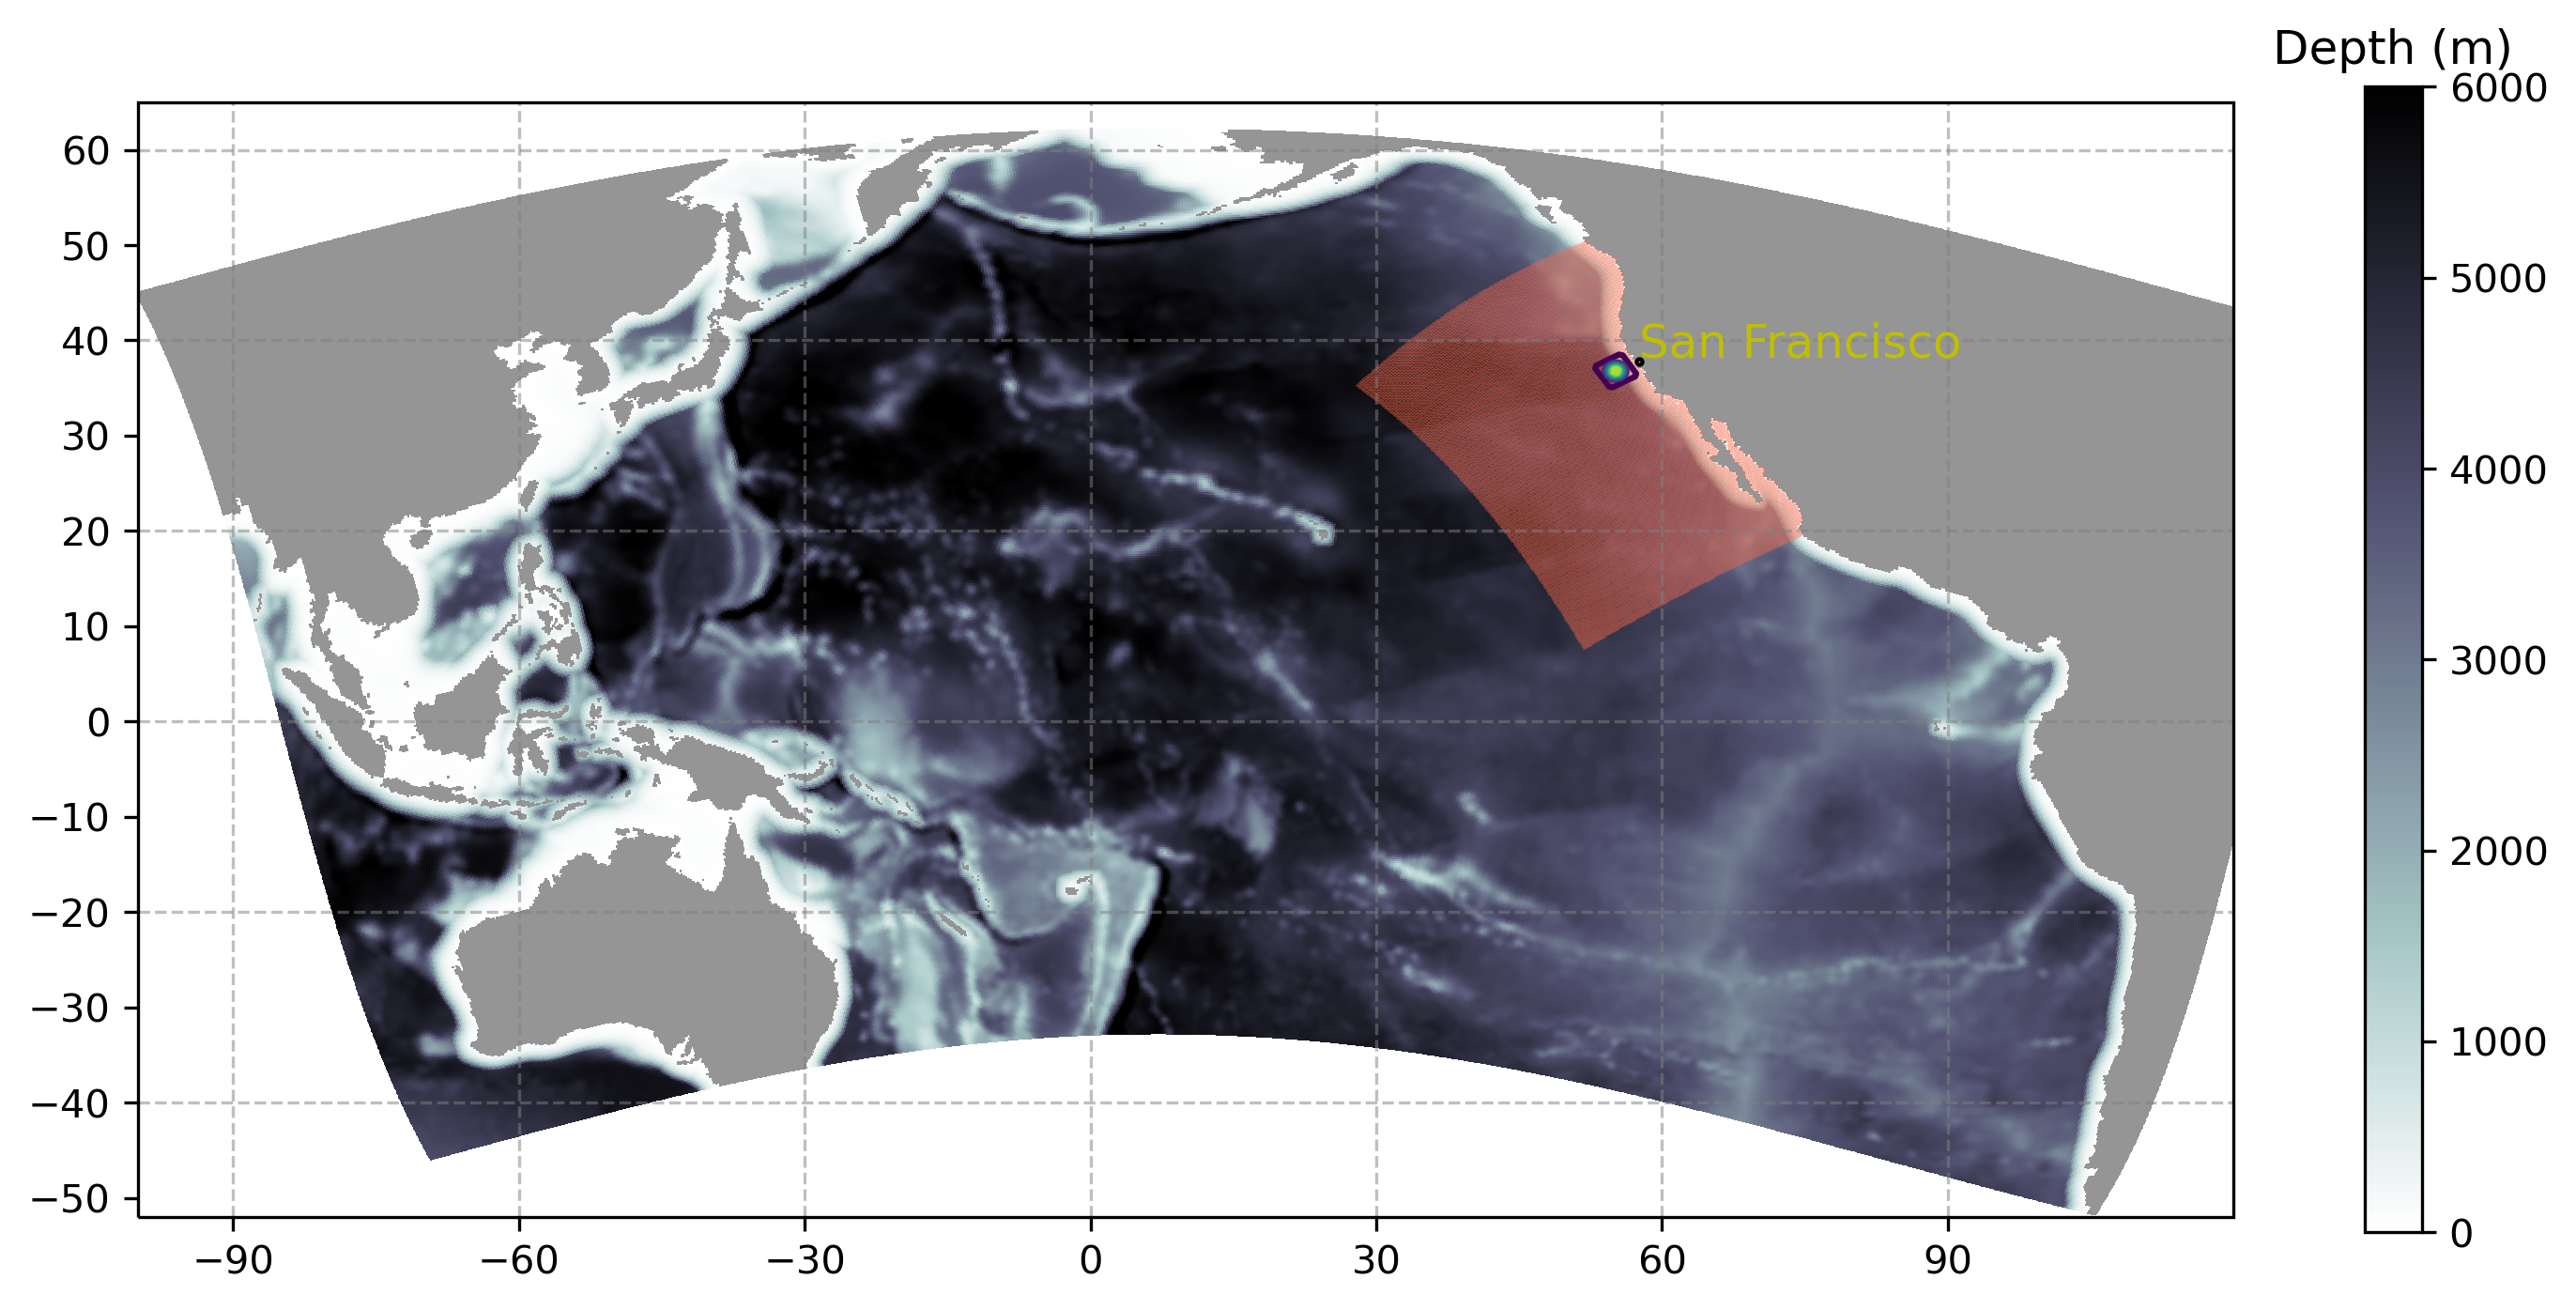

In [698]:
fig = plt.figure(figsize=(12,12),dpi=300)

ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

sca = ax.pcolormesh(parent_grd.lon_rho-180,
                parent_grd.lat_rho,
                parent_grd.h,
                transform=ccrs.PlateCarree(),
                cmap='bone_r',vmin=0,vmax=6000);
cb = fig.colorbar(sca, ax=ax, shrink=0.44)

sca = ax.pcolormesh(parent_grd.lon_rho-180,
                parent_grd.lat_rho,
                parent_grd.mask_rho.where(parent_grd.mask_rho<1),
                transform=ccrs.PlateCarree(),
                cmap='Greys',vmin=-1,vmax=1);

sca = ax.pcolormesh(grd.lon_rho-180,
                grd.lat_rho,
                grd.mask_rho.where(grd.mask_rho>0),
                transform=ccrs.PlateCarree(),
                cmap='Reds',alpha=0.3,vmin=-1,vmax=3);

plt.contour(grd.lon_rho-180,
            grd.lat_rho,
            alk_flux[0,:],
            transform=ccrs.PlateCarree());

cb.ax.set_title('Depth (m)')

plt.plot(true_lon-180,true_lat,'.',color='y',markeredgecolor='k',markersize=3,transform=ccrs.PlateCarree())
plt.text(true_lon-180,true_lat+.5,'San Francisco',fontsize=12,color='y',transform=ccrs.PlateCarree())

ax.set_extent([-100, 120, -52, 65], ccrs.PlateCarree())
ax.set_xticks(np.arange(-90, 120, 30), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(-50, 70, 10), crs=ccrs.PlateCarree())
# lon_formatter = LongitudeFormatter(zero_direction_label=False)
# lat_formatter = LatitudeFormatter()
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)  
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                  color='gray', alpha=0.5, linestyle='--')
#ax.stock_img()
#ax.add_feature(cfeature.LAND, facecolor='lightgray')

#ax.set_title('excess_ALK at surface ' + str(da.time.values[tstep])[:10], loc='left')

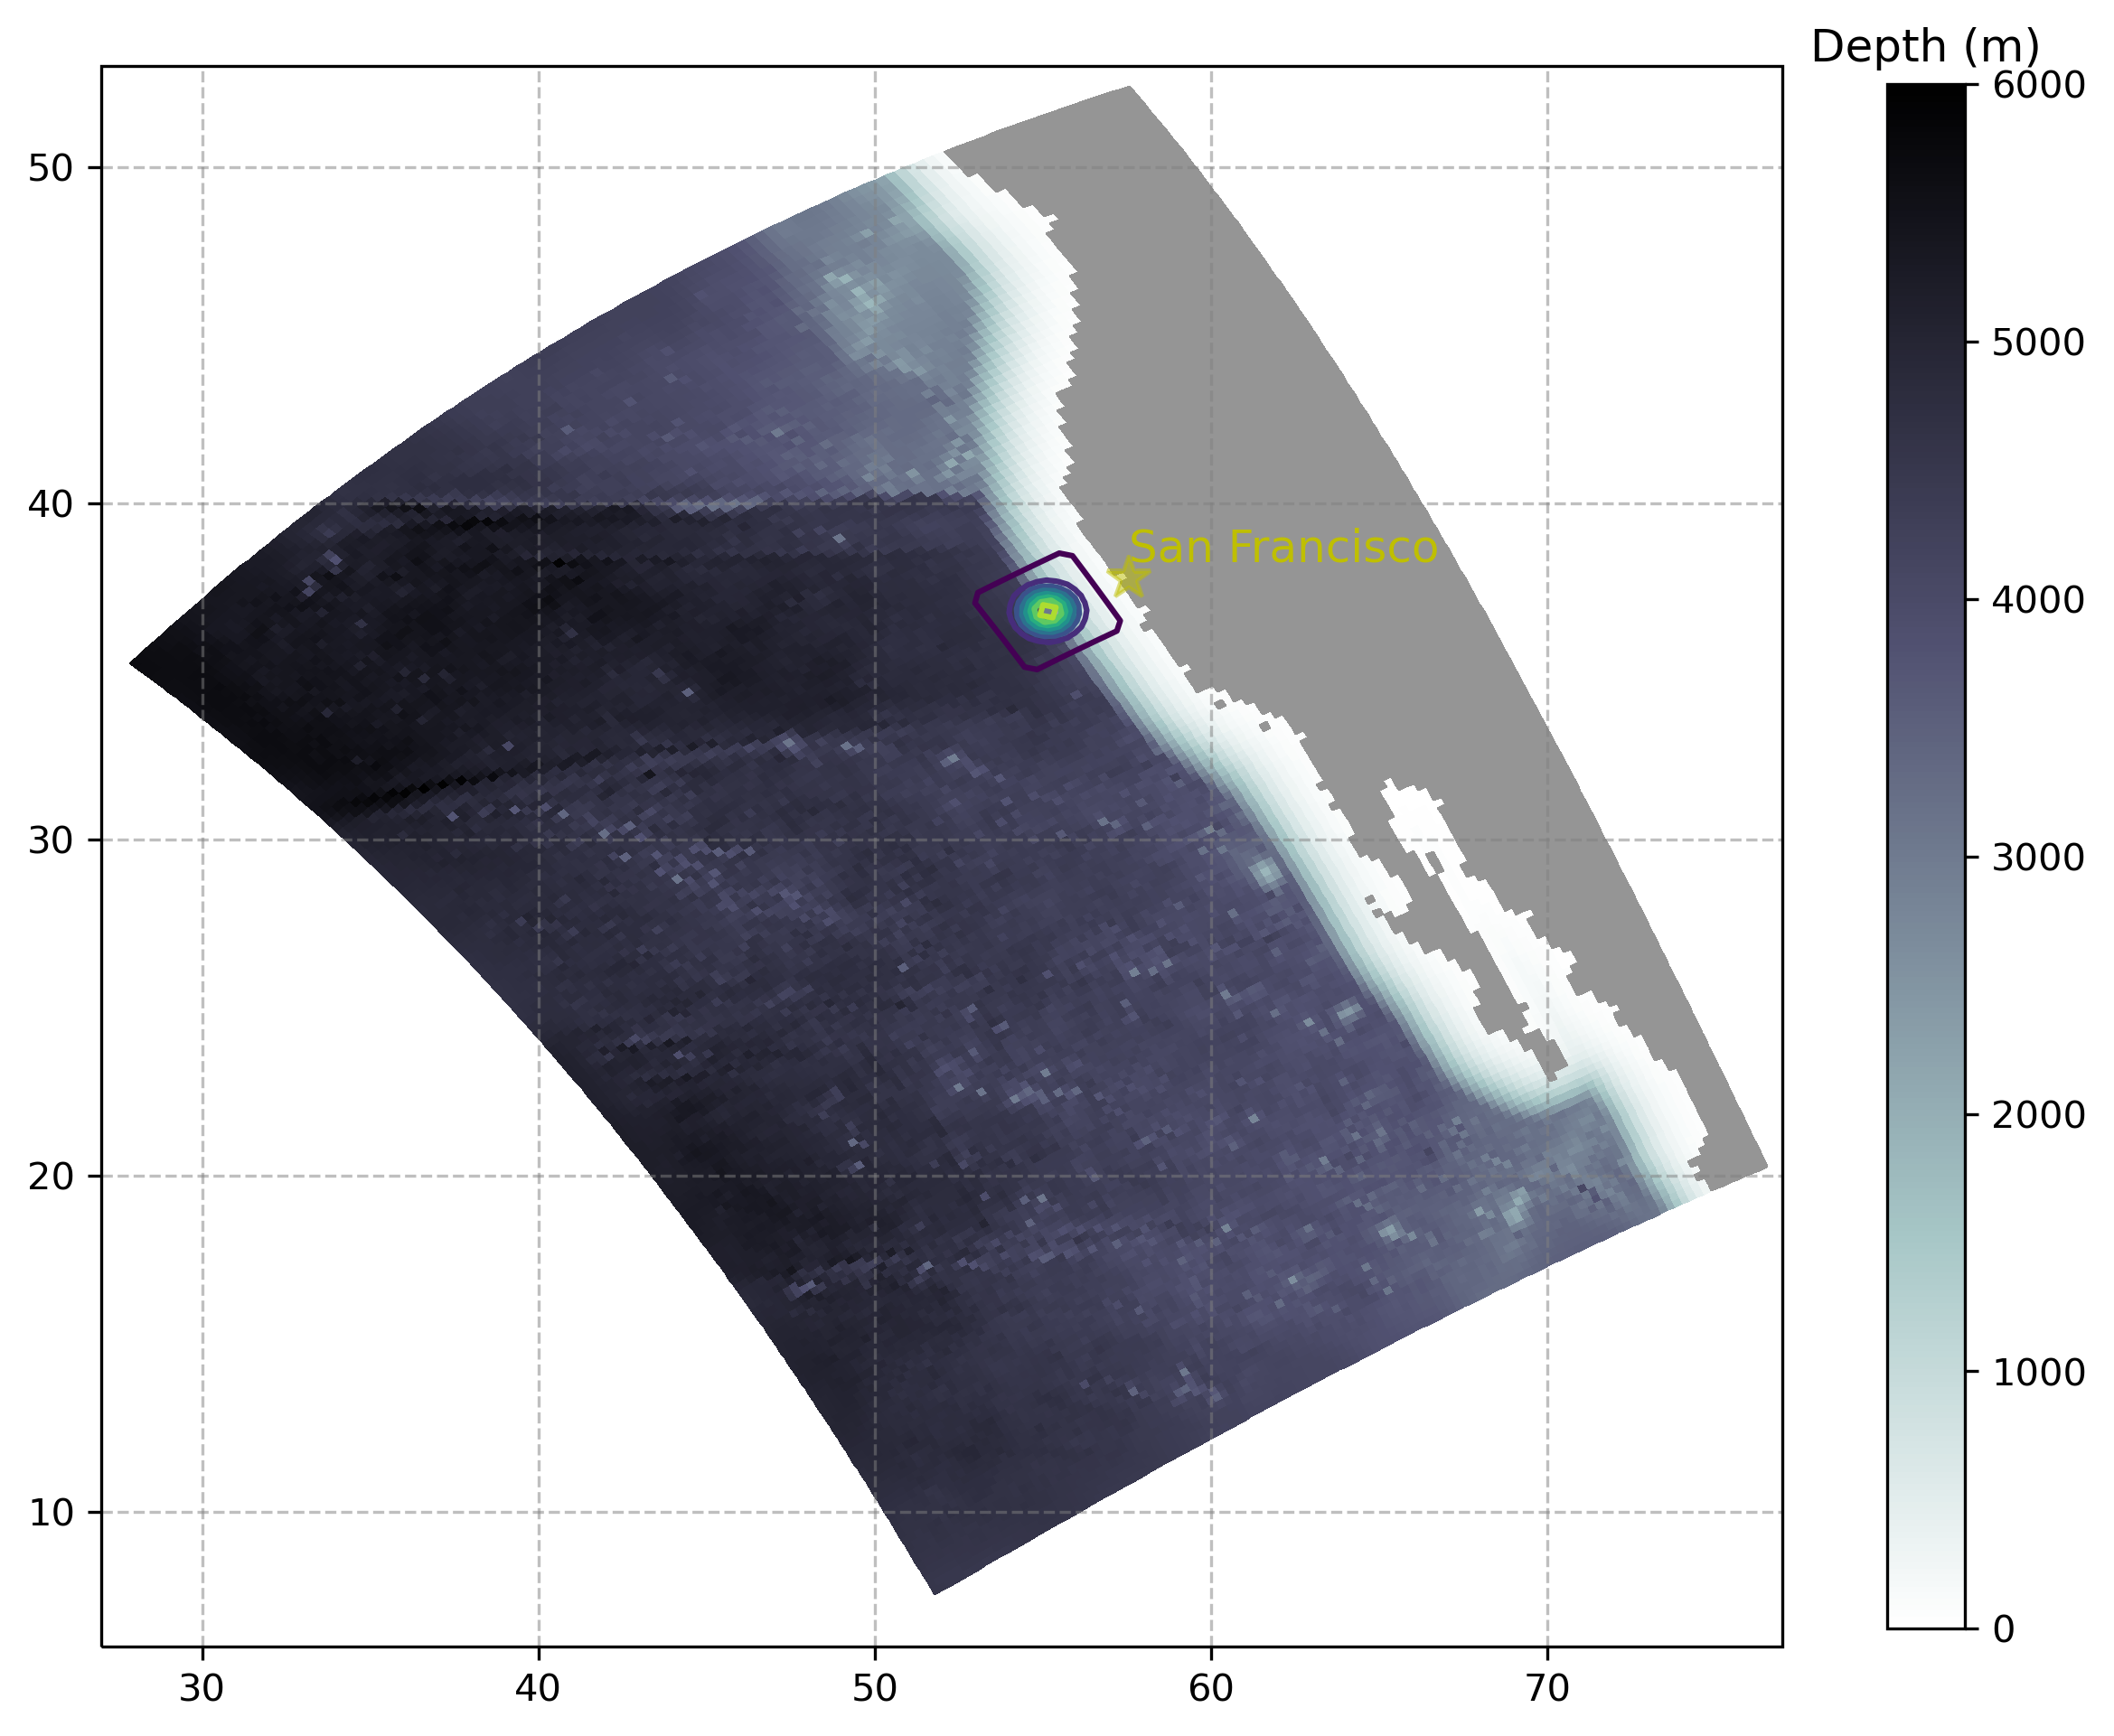

In [699]:
fig = plt.figure(figsize=(10,10),dpi=300)

ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

sca = ax.pcolormesh(grd.lon_rho-180,
                grd.lat_rho,
                grd.h,
                transform=ccrs.PlateCarree(),
                cmap='bone_r',vmin=0,vmax=6000);
cb = fig.colorbar(sca, ax=ax, shrink=0.74)

sca = ax.pcolormesh(grd.lon_rho-180,
                grd.lat_rho,
                grd.mask_rho.where(grd.mask_rho<1),
                transform=ccrs.PlateCarree(),
                cmap='Greys',vmin=-1,vmax=1);

plt.contour(grd.lon_rho-180,
            grd.lat_rho,
            alk_flux[0,:],
            transform=ccrs.PlateCarree());




cb.ax.set_title('Depth (m)')

plt.plot(true_lon-180,true_lat,'*',color='y',alpha=.5,markersize=12,transform=ccrs.PlateCarree())
plt.text(true_lon-180,true_lat+.5,'San Francisco',fontsize=12,color='y',transform=ccrs.PlateCarree())

# plt.plot(xloc-10*resfac,yloc,'*',color='b')
# plt.contour(alk_flux[0,:])

#plt.text(xloc,yloc+2,'San Francisco',color='y')

ax.set_extent([27, 77, 6, 53], ccrs.PlateCarree())
ax.set_xticks(np.arange(30, 80, 10), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(10, 60, 10), crs=ccrs.PlateCarree())
# lon_formatter = LongitudeFormatter(zero_direction_label=False)
# lat_formatter = LatitudeFormatter()
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)  
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                  color='gray', alpha=0.5, linestyle='--')
#ax.stock_img()
#ax.add_feature(cfeature.LAND, facecolor='lightgray')

#ax.set_title('excess_ALK at surface ' + str(da.time.values[tstep])[:10], loc='left')

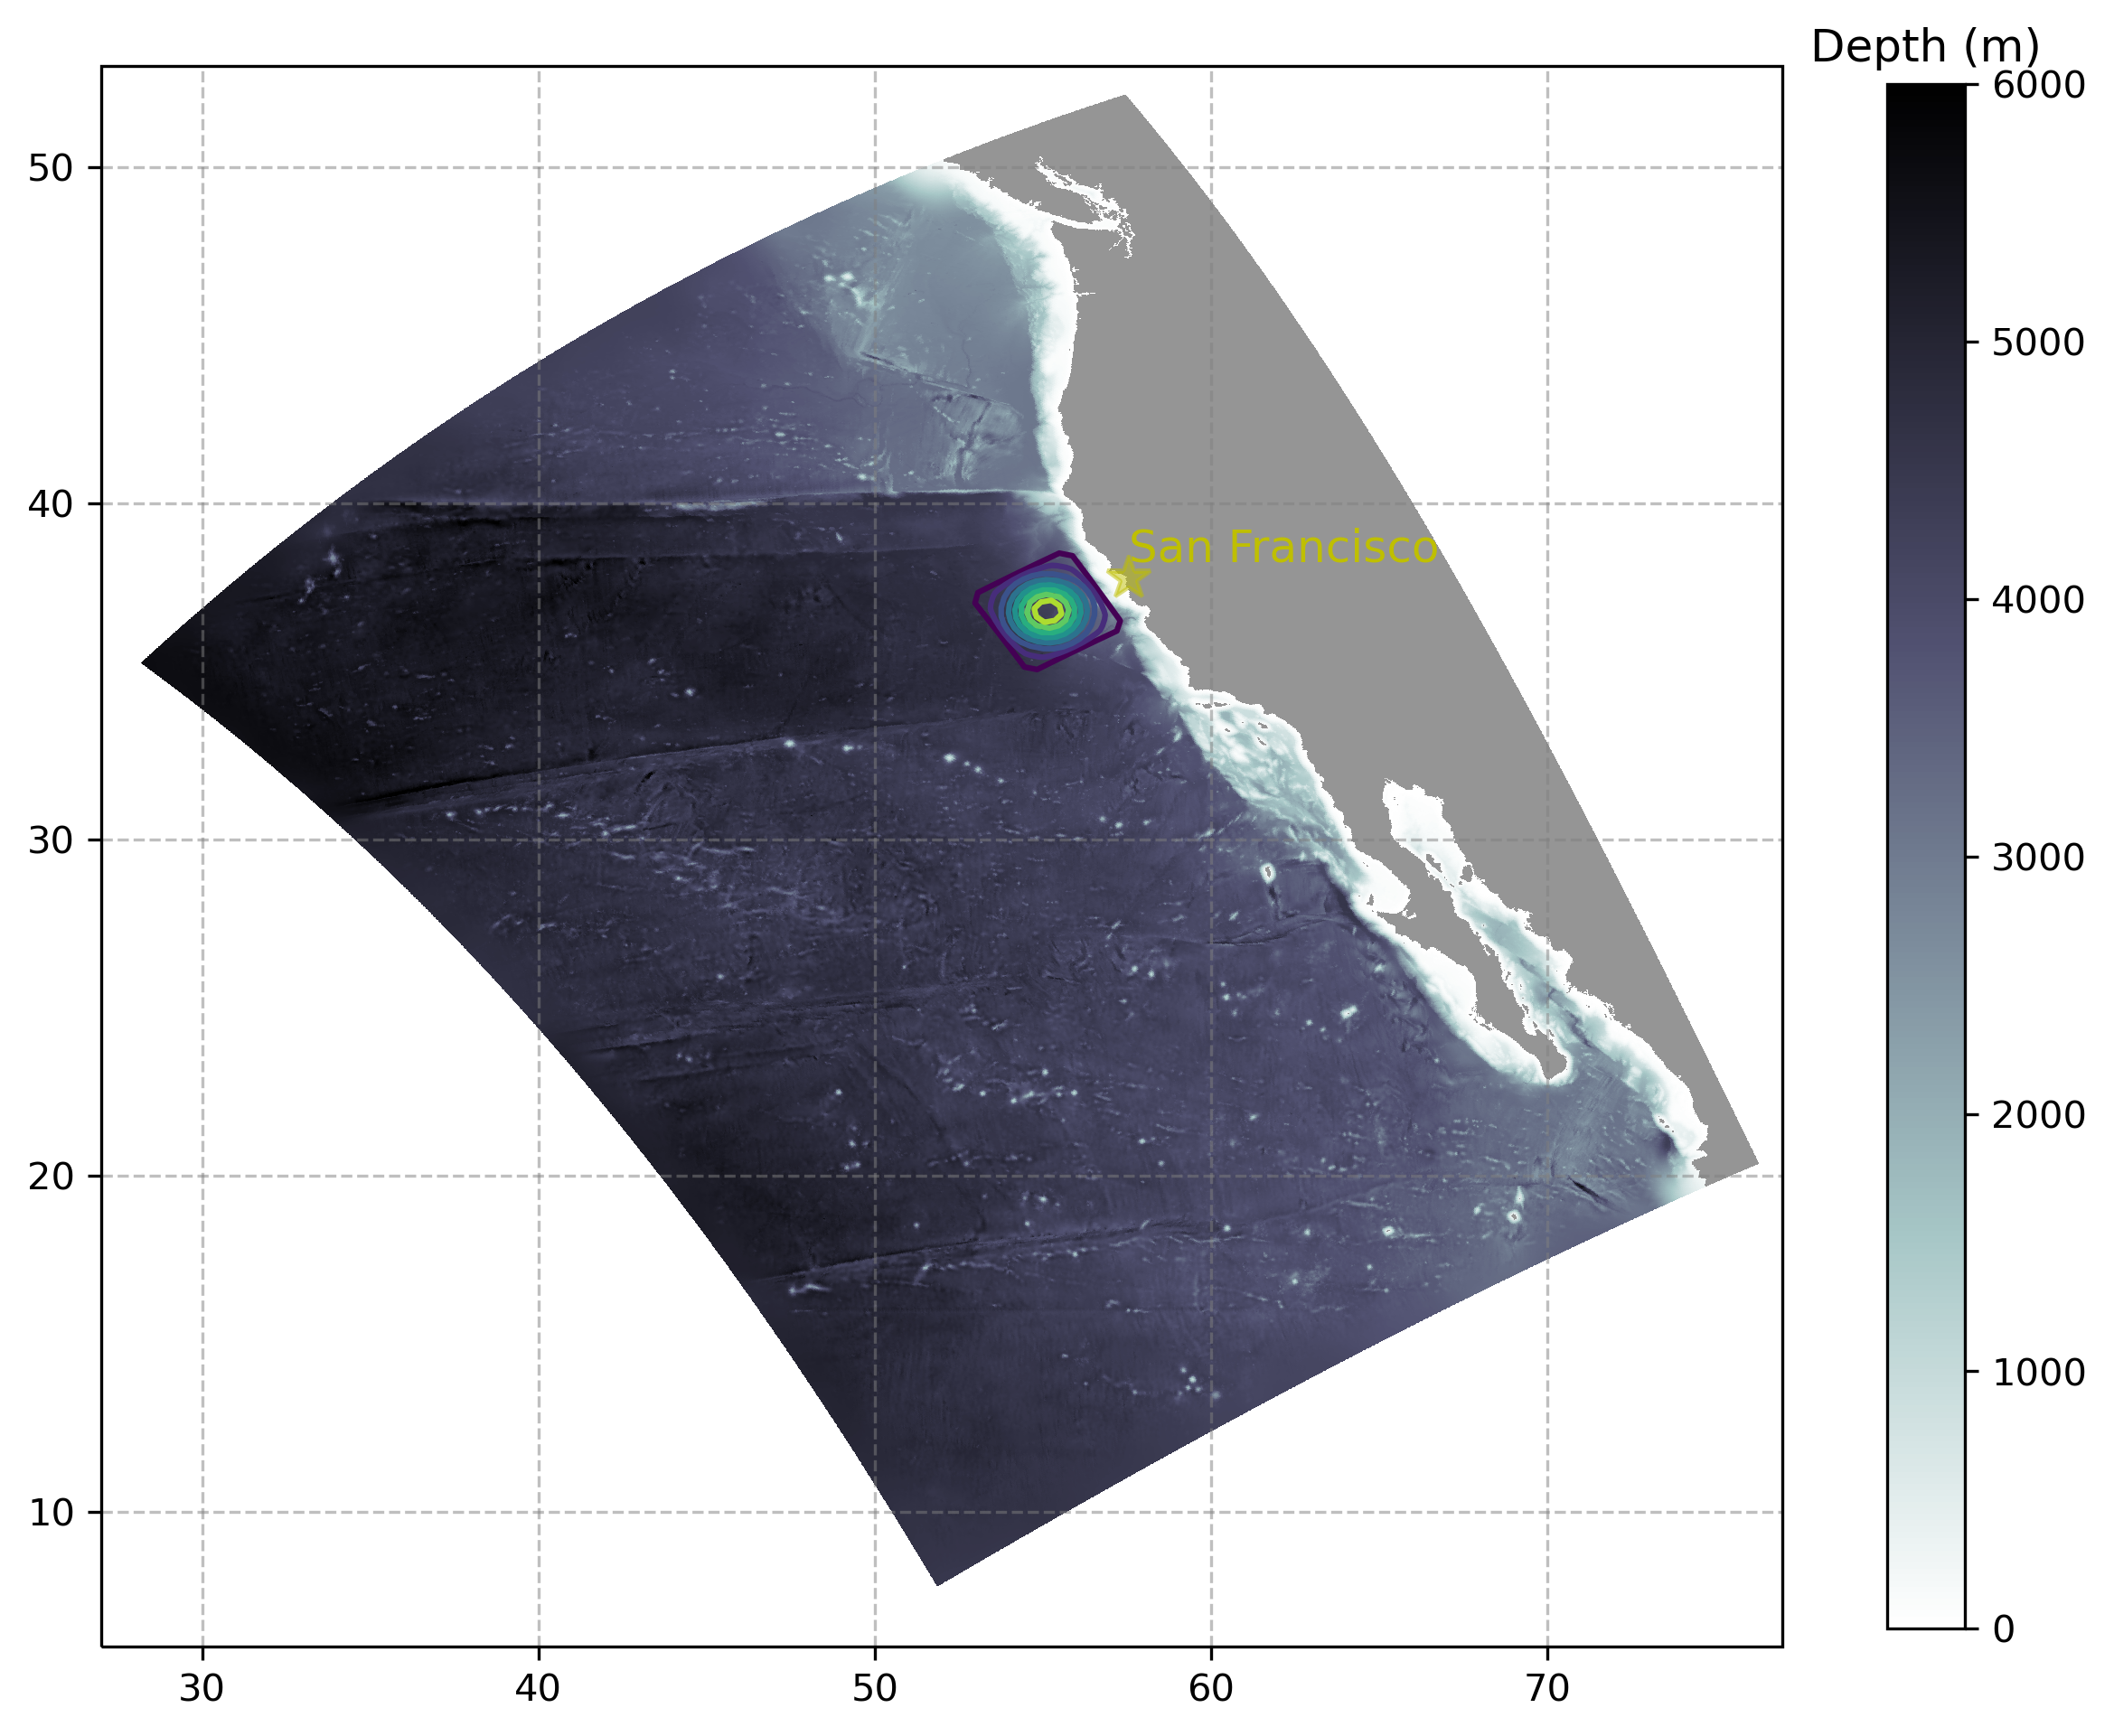

In [661]:
fig = plt.figure(figsize=(10,10),dpi=300)

ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

sca = ax.pcolormesh(grd_hi.lon_rho-180,
                grd_hi.lat_rho,
                grd_hi.h,
                transform=ccrs.PlateCarree(),
                cmap='bone_r',vmin=0,vmax=6000);
cb = fig.colorbar(sca, ax=ax, shrink=0.74)

sca = ax.pcolormesh(grd_hi.lon_rho-180,
                grd_hi.lat_rho,
                grd_hi.mask_rho.where(grd_hi.mask_rho<1),
                transform=ccrs.PlateCarree(),
                cmap='Greys',vmin=-1,vmax=1);

plt.contour(grd.lon_rho-180,
            grd.lat_rho,
            alk_flux[0,:],
            transform=ccrs.PlateCarree());




cb.ax.set_title('Depth (m)')

plt.plot(true_lon-180,true_lat,'*',color='y',alpha=.5,markersize=12,transform=ccrs.PlateCarree())
plt.text(true_lon-180,true_lat+.5,'San Francisco',fontsize=12,color='y',transform=ccrs.PlateCarree())

# plt.plot(xloc-10*resfac,yloc,'*',color='b')
# plt.contour(alk_flux[0,:])

#plt.text(xloc,yloc+2,'San Francisco',color='y')

ax.set_extent([27, 77, 6, 53], ccrs.PlateCarree())
ax.set_xticks(np.arange(30, 80, 10), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(10, 60, 10), crs=ccrs.PlateCarree())
# lon_formatter = LongitudeFormatter(zero_direction_label=False)
# lat_formatter = LatitudeFormatter()
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)  
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                  color='gray', alpha=0.5, linestyle='--')

In [13]:
parent_grd

NameError: name 'parent_grd' is not defined